In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
#%matplotlib notebook

import numpy as np
from tqdm import tqdm_notebook as tqdm
import pathlib
from pathlib import Path
Path.ls = lambda x: [p for p in list(x.iterdir()) if '.ipynb_checkpoints' not in p.name]
import pandas as pd
import PIL

import slide, filter, util, tiles
from shared.roi import RegionOfInterestDefinedByCoordinates


base_path = Path('/home/Deep_Learner/shared/Datasets/Hypophysenadenome/')
wsis_path = base_path/'wsis_experimenting'
rois_path = base_path/'rois_experimenting'
tiles_path = base_path/'tiles_experimenting'
wsis_path.mkdir(exist_ok=True)
tiles_path.mkdir(exist_ok=True)

# WSIs

## Process one WSI

In [11]:
p = wsis_path.ls()[0];p
ts = tiles.WsiOrROIToTiles(wsi_path=p, 
                      tiles_folder_path=None, 
                      tile_height=256,
                      tile_width=256,
                      minimal_acceptable_tile_height=0.7,
                      minimal_acceptable_tile_width=0.7,
                      save_tiles=False, 
                      tile_score_thresh = 0.2, 
                      return_as_tilesummary_object=True, 
                      verbose=True)

Starting to process /home/Deep_Learner/shared/Datasets/Hypophysenadenome/wsis_experimenting/1422-10-IV-HE.ndpi
/home/Deep_Learner/shared/Datasets/Hypophysenadenome/wsis_experimenting/1422-10-IV-HE.ndpi: Number of tiles that will be kept/all possible tiles: 1692/16170


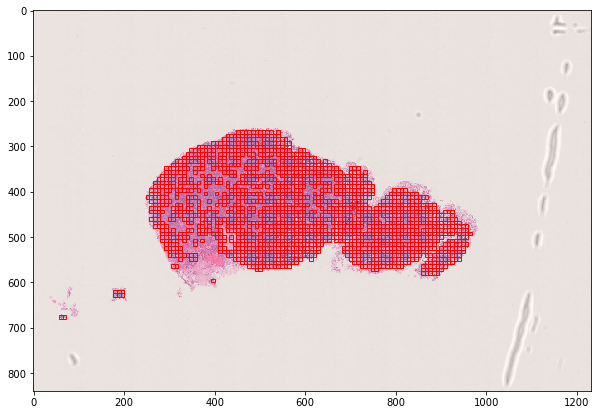

In [4]:
ts.show_wsi_with_marked_tiles()

In [12]:
tile = ts.top_tiles()[150]

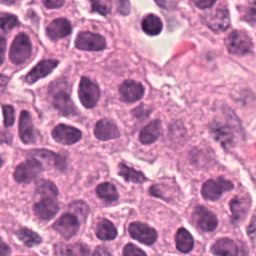

In [14]:
tile.get_pil_image()

## Process multiple WSIs in parallel

In [38]:
ts_list = tiles.WsiOrROIToTilesMultithreaded(wsi_paths=wsis_path.ls()[:2], 
                                       tiles_folder_path=None, 
                                   tile_height=256, 
                                   tile_width=256,
                                   minimal_acceptable_tile_height=0.7,
                                   minimal_acceptable_tile_width=0.7,
                                   save_tiles=False,
                                   tile_score_thresh = 0.2,
                                   return_as_tilesummary_object=True, 
                                   verbose=True)

  0%|          | 0/2 [00:00<?, ?it/s]

Starting to process /home/Deep_Learner/shared/Datasets/Hypophysenadenome/wsis_experimenting/1422-10-IV-HE.ndpi
Starting to process /home/Deep_Learner/shared/Datasets/Hypophysenadenome/wsis_experimenting/125-15-II-HE.ndpi
/home/Deep_Learner/shared/Datasets/Hypophysenadenome/wsis_experimenting/1422-10-IV-HE.ndpi: Number of tiles that will be kept/all possible tiles: 1692/16170


 50%|█████     | 1/2 [00:06<00:06,  6.56s/it]

/home/Deep_Learner/shared/Datasets/Hypophysenadenome/wsis_experimenting/125-15-II-HE.ndpi: Number of tiles that will be kept/all possible tiles: 1127/26754


100%|██████████| 2/2 [00:10<00:00,  5.63s/it]

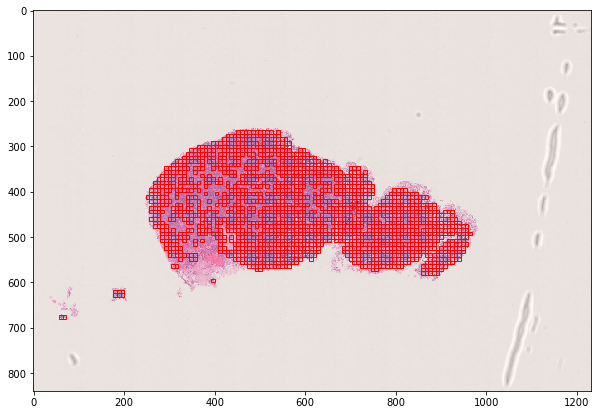

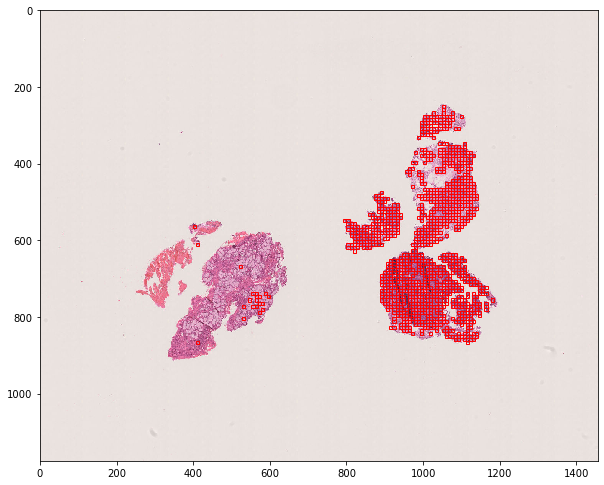

In [39]:
for ts in ts_list:
    ts.show_wsi_with_marked_tiles()

## Extract one tile directly from a WSI at a specific level

In [40]:
p = wsis_path.ls()[0];p

PosixPath('/home/Deep_Learner/shared/Datasets/Hypophysenadenome/wsis_experimenting/1422-10-IV-HE.ndpi')

In [41]:
s = slide.open_slide(p)

In [42]:
s.level_dimensions

((39424, 26880),
 (19712, 13440),
 (9856, 6720),
 (4928, 3360),
 (2464, 1680),
 (1232, 840),
 (616, 420),
 (308, 210),
 (154, 105))

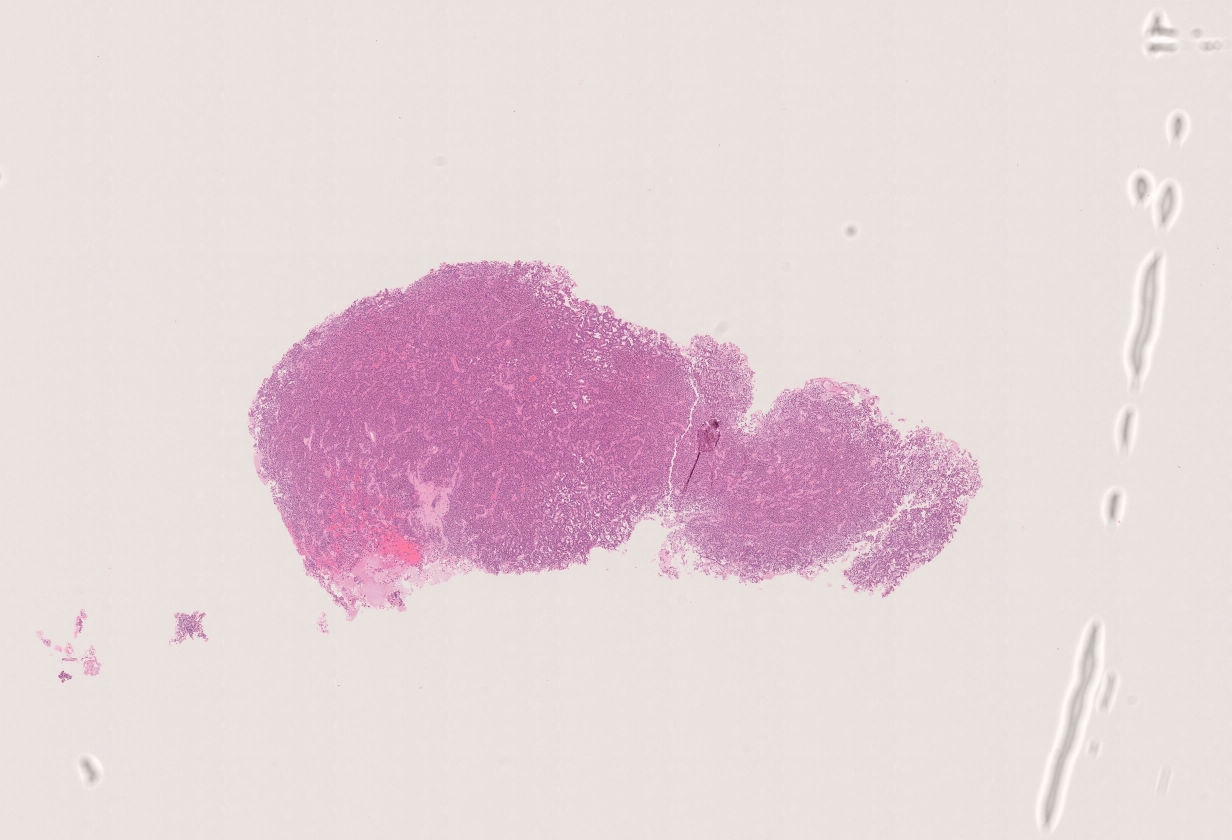

In [43]:
tiles.ExtractTileFromWSI(p, x=0,y=0, width=1232,height=840,level=5)

## specify rois by coordinates 

In [8]:
wsi_path = wsis_path.ls()[0];wsi_path

PosixPath('/home/Deep_Learner/shared/Datasets/Hypophysenadenome/wsis_experimenting/1422-10-IV-HE.ndpi')

In [9]:
wsi = slide.open_slide(wsi_path)

In [10]:
wsi.level_dimensions

((39424, 26880),
 (19712, 13440),
 (9856, 6720),
 (4928, 3360),
 (2464, 1680),
 (1232, 840),
 (616, 420),
 (308, 210),
 (154, 105))

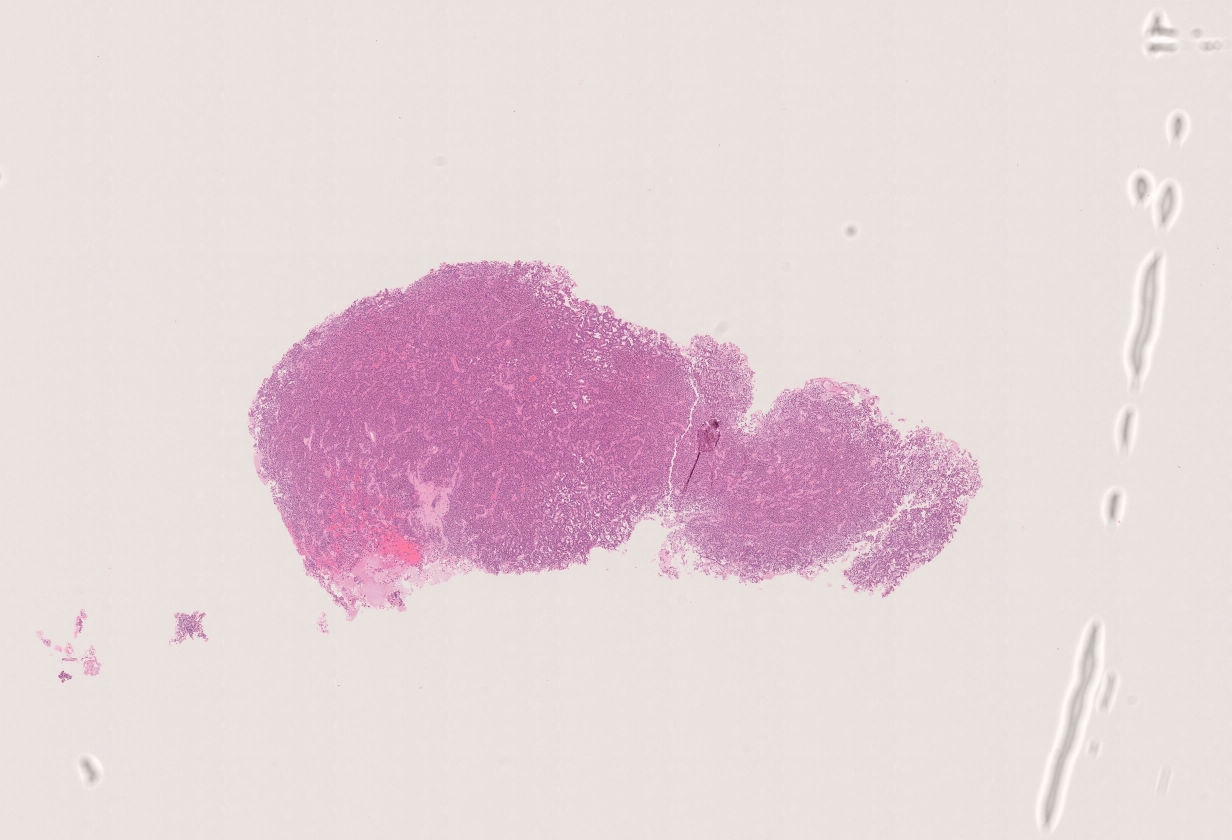

In [87]:
png_img = tiles.wsi_to_scaled_pil_image(wsi_path)[0];png_img

In [11]:
roi1 = RegionOfInterestDefinedByCoordinates(roi_id='r1', 
                                            x_upper_left=20000, 
                                            y_upper_left=13000, 
                                            height=3000, 
                                            width=3000, 
                                            level=0)

roi2 = RegionOfInterestDefinedByCoordinates(roi_id='r2', 
                                            x_upper_left=10000, 
                                            y_upper_left=13000, 
                                            height=5000, 
                                            width=5000, 
                                            level=0)
rois = [roi1, roi2]

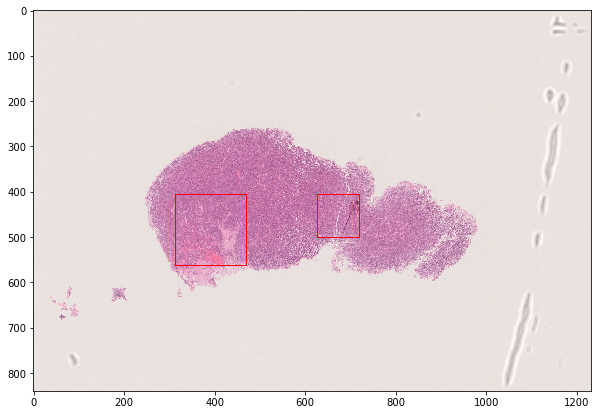

In [12]:
util.show_wsi_with_rois(wsi_path, rois)

In [27]:
ts = tiles.WsiOrROIToTiles(wsi_path=wsi_path, 
                      tiles_folder_path=None, 
                      tile_height=256,
                      tile_width=256,
                      minimal_acceptable_tile_height=0.0,
                      minimal_acceptable_tile_width=0.0,                    
                      save_tiles=False, 
                      tile_score_thresh = 0.0, #take every possible tile inside the rois
                      level = 0,
                      return_as_tilesummary_object=True, 
                      rois=rois, 
                      verbose=True)

Starting to process /home/Deep_Learner/shared/Datasets/Hypophysenadenome/wsis_experimenting/1422-10-IV-HE.ndpi
/home/Deep_Learner/shared/Datasets/Hypophysenadenome/wsis_experimenting/1422-10-IV-HE.ndpi: Number of tiles that will be kept/all possible tiles: 544/544


In [28]:
for t in ts.tiles:
    if t.get_width() != 256:
        print(t.get_width())

192
192
192
192
192
192
192
192
192
192
192
192
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128
128


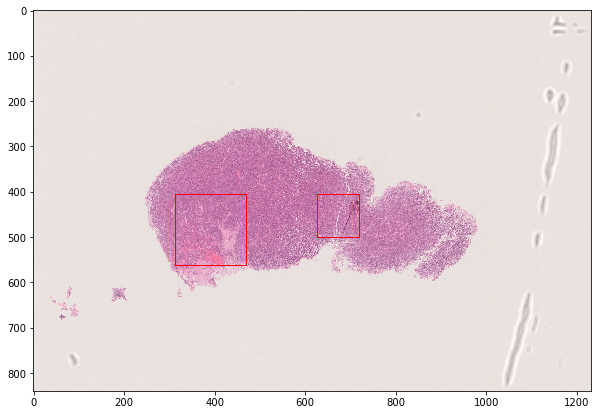

In [29]:
ts.show_wsi_with_rois()

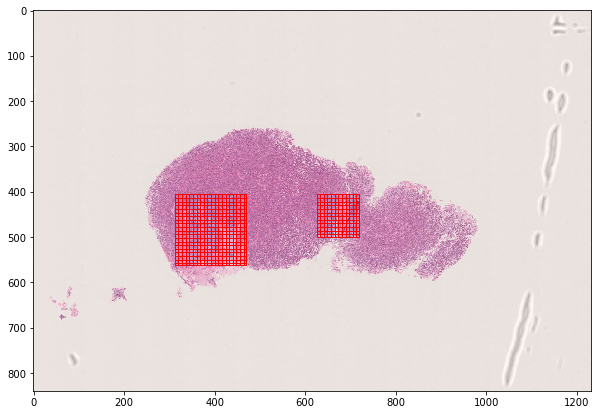

In [30]:
ts.show_wsi_with_marked_tiles()

# ROIs (rois that have already been extracted from a wsi and saved as .png for example)

## Process one ROI

In [46]:
from tile_extraction.tiles import *

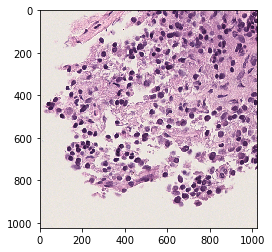

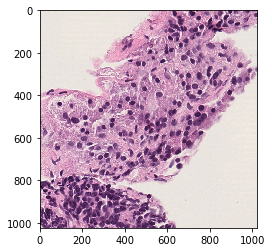

In [7]:
p = rois_path.ls()[0];p

tiles.WsiOrROIToTiles(wsi_path=p, 
                      tiles_folder_path=tiles_path, 
                      tile_height=1024,
                      tile_width=1024,  
                      tile_naming_func=tiles.get_roi_name_from_path_pituitary_adenoma_entities, 
                      save_tiles=True, 
                      return_as_tilesummary_object=False)

util.show_multiple_images_big(tiles_path.ls()[:2])

## Extract one tile directly from a ROI

(3089, 3089)


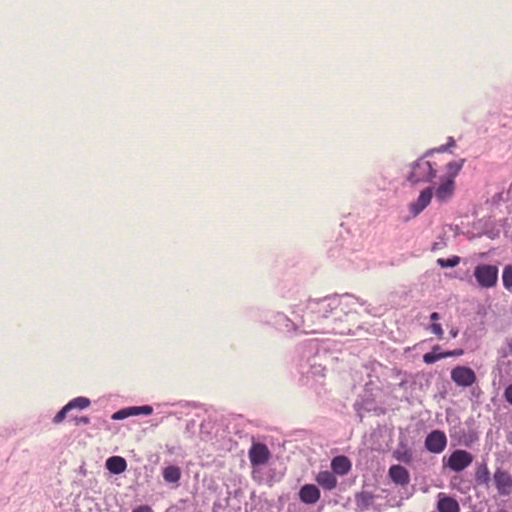

In [8]:
p = rois_path.ls()[0];p

img = PIL.Image.open(p)

print(img.size)

tiles.ExtractTileFromPILImage(p, 1000, 1000, 512, 512)